In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import warnings

In [6]:
df = pd.read_csv('dataset/new_df.csv')
markdown_table = df.head().to_markdown()
print(markdown_table)

|    |   battery_power |   blue |   clock_speed |   dual_sim |   fc |   four_g |   int_memory |   m_dep |   mobile_wt |   n_cores |   pc |   px_height |   px_width |   ram |   sc_h |   sc_w |   talk_time |   three_g |   touch_screen |   wifi |   price_range |
|---:|----------------:|-------:|--------------:|-----------:|-----:|---------:|-------------:|--------:|------------:|----------:|-----:|------------:|-----------:|------:|-------:|-------:|------------:|----------:|---------------:|-------:|--------------:|
|  0 |             842 |      0 |           2.2 |          0 |    1 |        0 |            7 |     0.6 |         188 |         2 |    2 |          20 |        756 |  2549 |      9 |      7 |          19 |         0 |              0 |      1 |             1 |
|  1 |            1021 |      1 |           0.5 |          1 |    0 |        1 |           53 |     0.7 |         136 |         3 |    6 |         905 |       1988 |  2631 |     17 |      3 |           7 |         1 |   

In [7]:
X = df.drop(columns=['price_range'],axis=1)


In [8]:
X.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,0,0,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0


In [9]:
y = df['price_range']
y

0       1
1       2
2       2
3       2
4       1
       ..
1986    0
1987    2
1988    3
1989    0
1990    3
Name: price_range, Length: 1991, dtype: int64

In [10]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_val.shape

((1592, 20), (399, 20))

In [11]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    cm = confusion_matrix(true, predicted)
    return accuracy, precision, recall, f1, cm

Decision Tree
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Validation set
- Accuracy: 0.8271


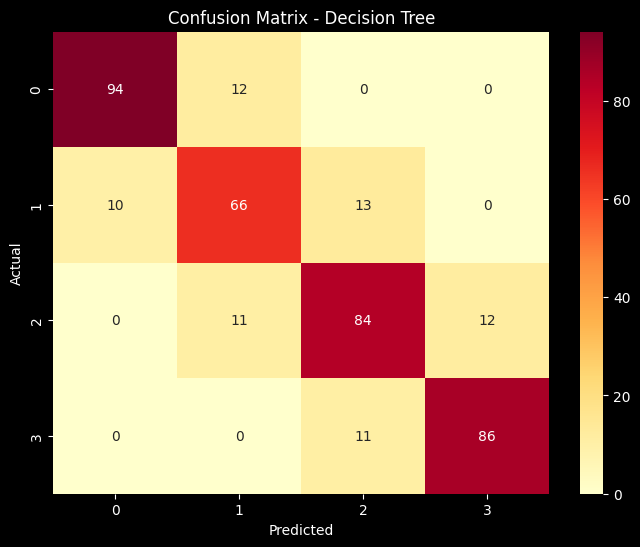



Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Validation set
- Accuracy: 0.8722


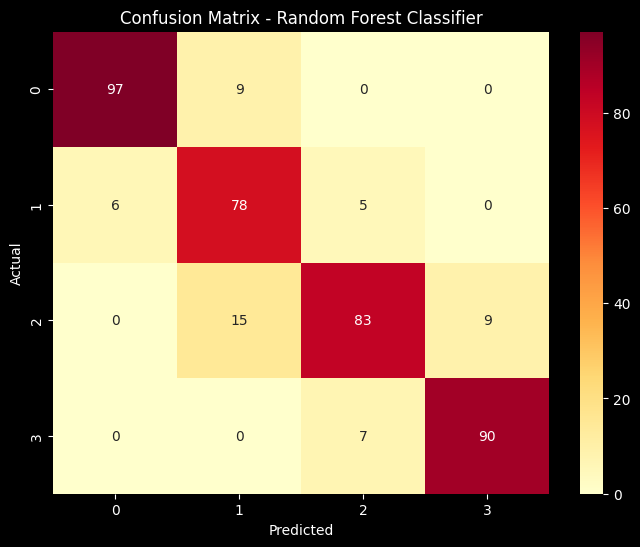



XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Validation set
- Accuracy: 0.9223


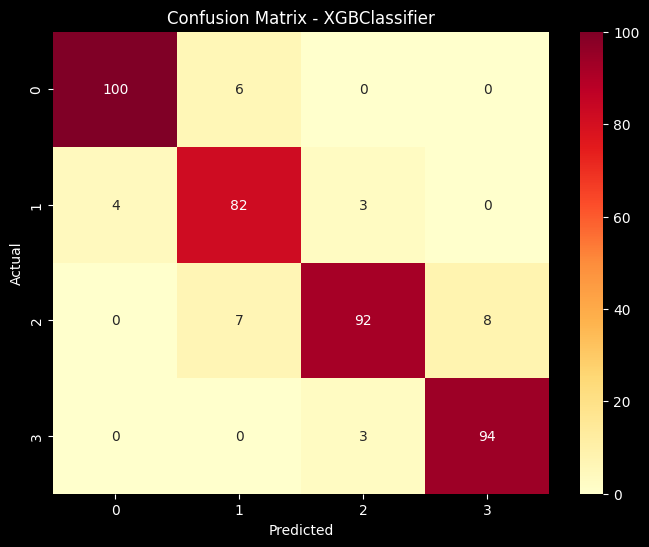



CatBoost Classifier
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Validation set
- Accuracy: 0.9398


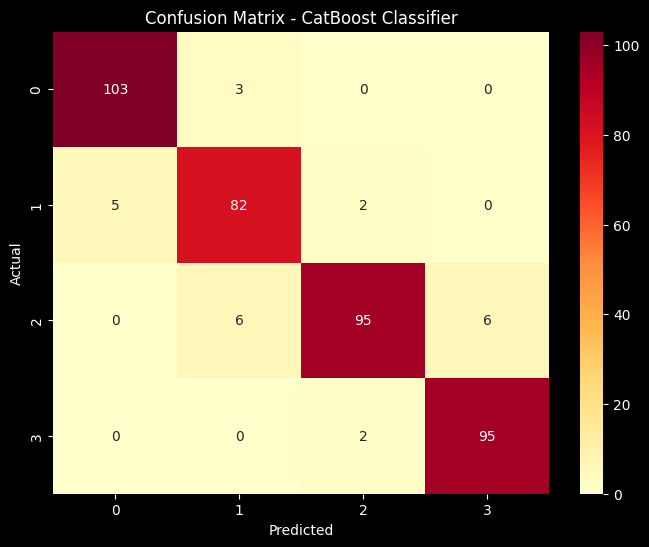

e:\Maid.cc\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.7425
----------------------------------
Model performance for Validation set
- Accuracy: 0.7018


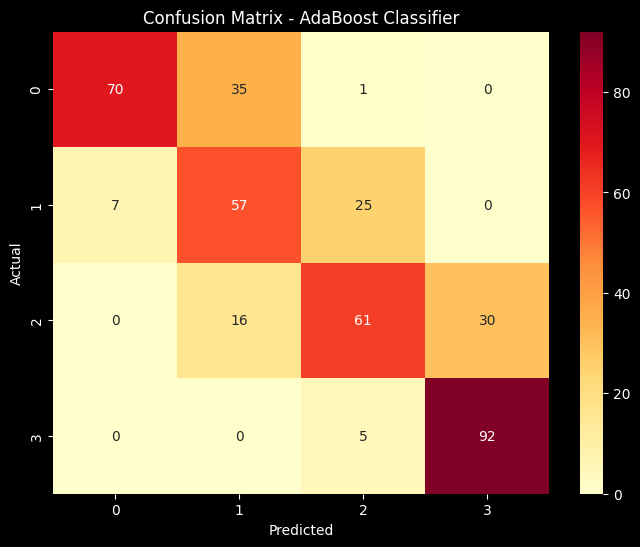

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

model_list = []
accuracy_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Evaluate Train and Validation dataset
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    print(model_name)
    model_list.append(model_name)
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(train_accuracy))
    print('----------------------------------')
    
    print('Model performance for Validation set')
    print("- Accuracy: {:.4f}".format(val_accuracy))
    accuracy_list.append(val_accuracy)
    
    plt.style.use('dark_background')

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True, cmap='YlOrRd', fmt='g')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print('='*35)
    print('\n')


In [18]:
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"], ascending=False)

,Model Name,Accuracy
3,CatBoost Classifier,0.939850
2,XGBClassifier,0.922306
1,Random Forest Classifier,0.872180
0,Decision Tree,0.827068
4,AdaBoost Classifier,0.701754


## From this results I can see that the best model with high accuracy was "CatBoost Classifier"

In [19]:
import os
import pickle

# Create the directory if it doesn't exist
directory = "dataset/"
if not os.path.exists(directory):
    os.makedirs(directory)

# Specify the file path
file_path = os.path.join(directory, 'catboost_model.pkl')

# Create and train the CatBoostClassifier model
model = CatBoostClassifier(verbose=False)
model.fit(X_train, y_train)

# Save the model as a pickle file
with open(file_path, 'wb') as f:
    pickle.dump(model, f)